# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import zipfile

from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

# Predict Sentiment

In [2]:
file_lists = [
    'likes_june_2017',
    'likes_nov_2017',
    'likes_dec_2017',
    'likes_june_2018',
    'likes_dec_2018',
    'likes_june_2019',
    'likes_dec_2019',
    'likes_june_2020',
    'likes_dec_2020',
    'likes_june_2021',
    'likes_dec_2021',
    'likes_june_2022',
    'likes_dec_2022',
    'likes_may_2023',
    'likes_june_2023',
    'likes_dec_2023',
]

df = pd.DataFrame()
for file in file_lists:
    df_ = pd.read_csv(f'{file}.csv', delimiter=";")
    df = pd.concat([df, df_])

df['created_at'] = pd.to_datetime(df['created_at'])
df['created_year'] = df['created_at'].dt.year

C:\Users\risma\AppData\Local\Temp\ipykernel_16584\2141482758.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['created_at'] = pd.to_datetime(df['created_at'])


In [3]:
tfid_vectorizer_pre_covid = TfidfVectorizer(ngram_range=(1, 2),  
                                  stop_words='english', 
                                  token_pattern=r"\b[a-z][a-z]+\b",
                                  lowercase=True,
                                  max_df = 0.6, max_features=4000)

tfid_vectorizer_covid = TfidfVectorizer(ngram_range=(1, 2),  
                                  stop_words='english', 
                                  token_pattern=r"\b[a-z][a-z]+\b",
                                  lowercase=True,
                                  max_df = 0.6, max_features=4000)

tfid_vectorizer_post_covid = TfidfVectorizer(ngram_range=(1, 2),  
                                  stop_words='english', 
                                  token_pattern=r"\b[a-z][a-z]+\b",
                                  lowercase=True,
                                  max_df = 0.6, max_features=4000)

tfid_data_pre_covid = tfid_vectorizer_pre_covid.fit_transform(df[df['created_year']<2019]['full_text'])
tfid_data_covid = tfid_vectorizer_covid.fit_transform(df[(df['created_year']>=2019)&(df['created_year']<2022)]['full_text'])
tfid_data_post_covid = tfid_vectorizer_post_covid.fit_transform(df[df['created_year']>=2022]['full_text'])

# Wordclouds

Pre COVID


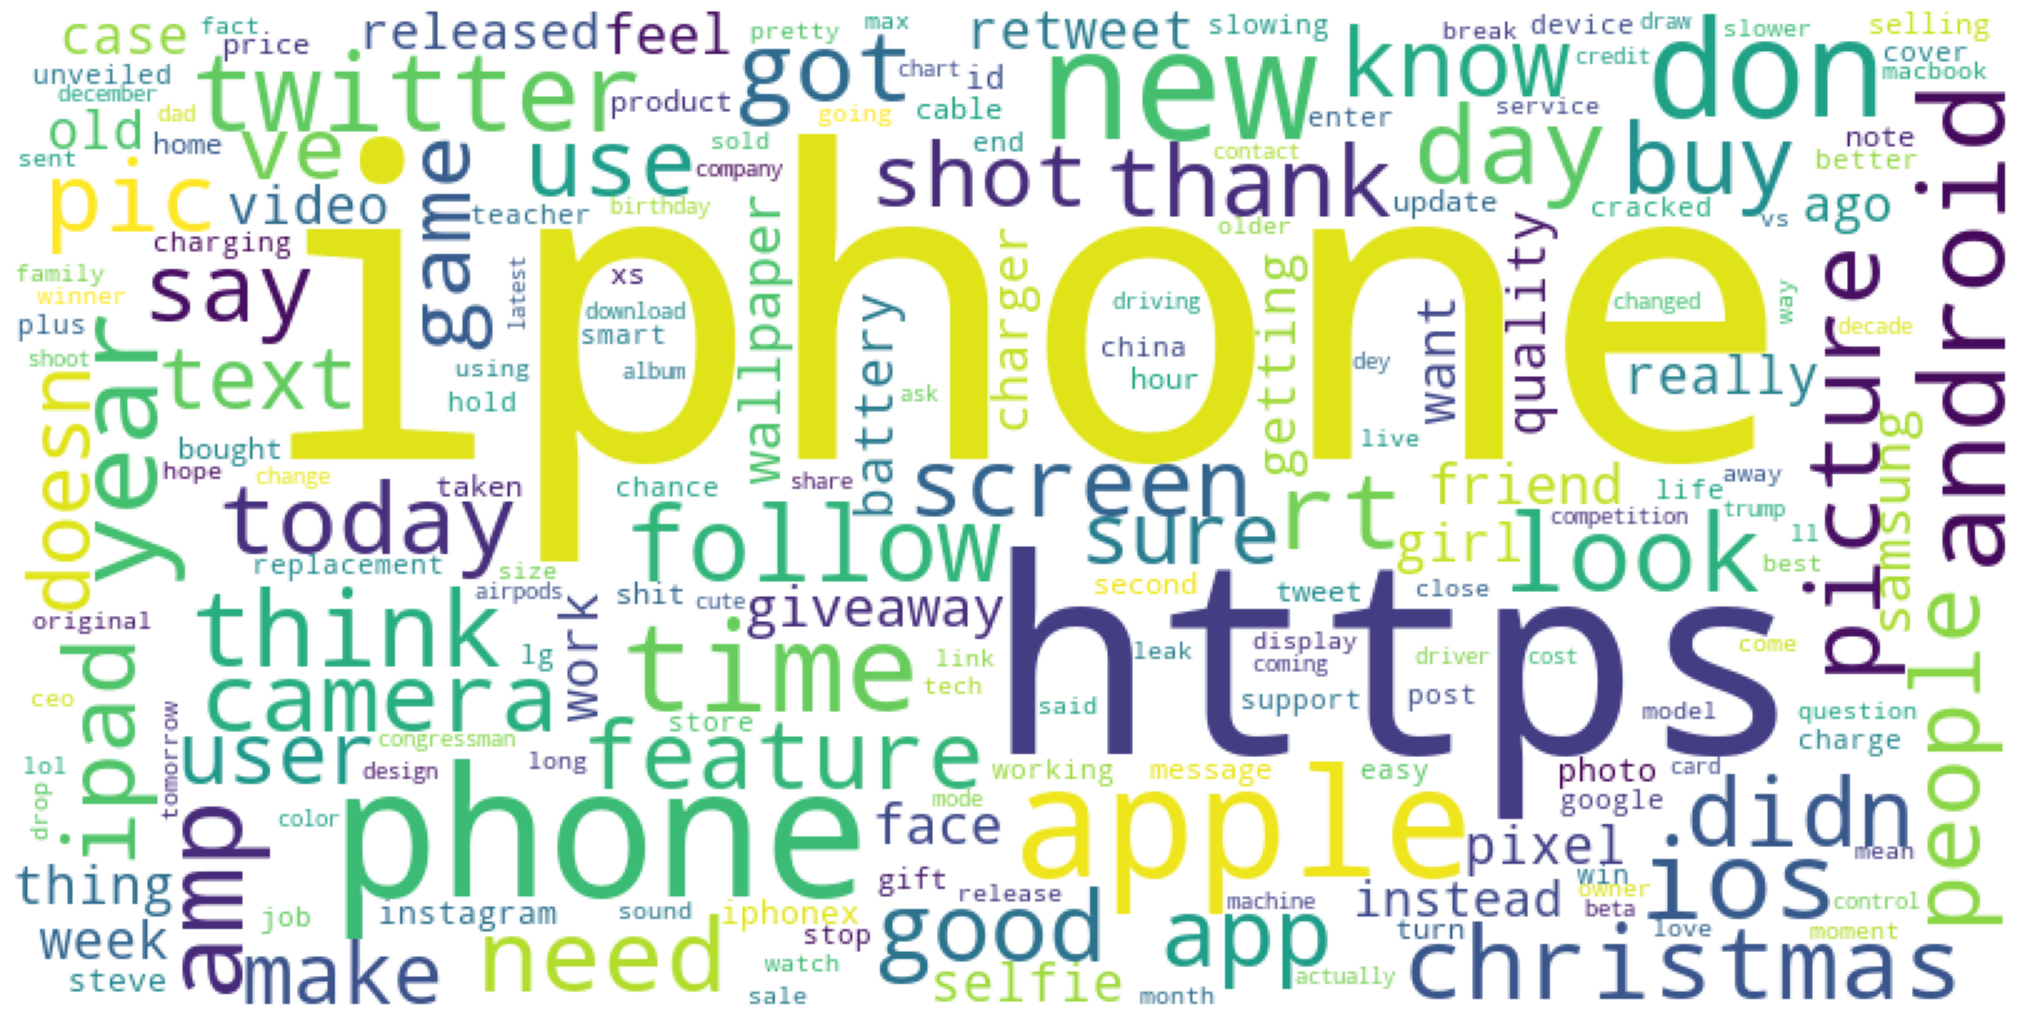

In [4]:
print("Pre COVID")
words_pre_covid = tfid_vectorizer_pre_covid.get_feature_names_out()
for_wordcloud_str_pre_covid = ' '.join(words_pre_covid)

wordcloud = WordCloud(width=800, height=400, background_color ='white',
                      min_font_size = 7).generate(for_wordcloud_str_pre_covid)

plt.figure(figsize=(20, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
 
plt.show()

During COVID


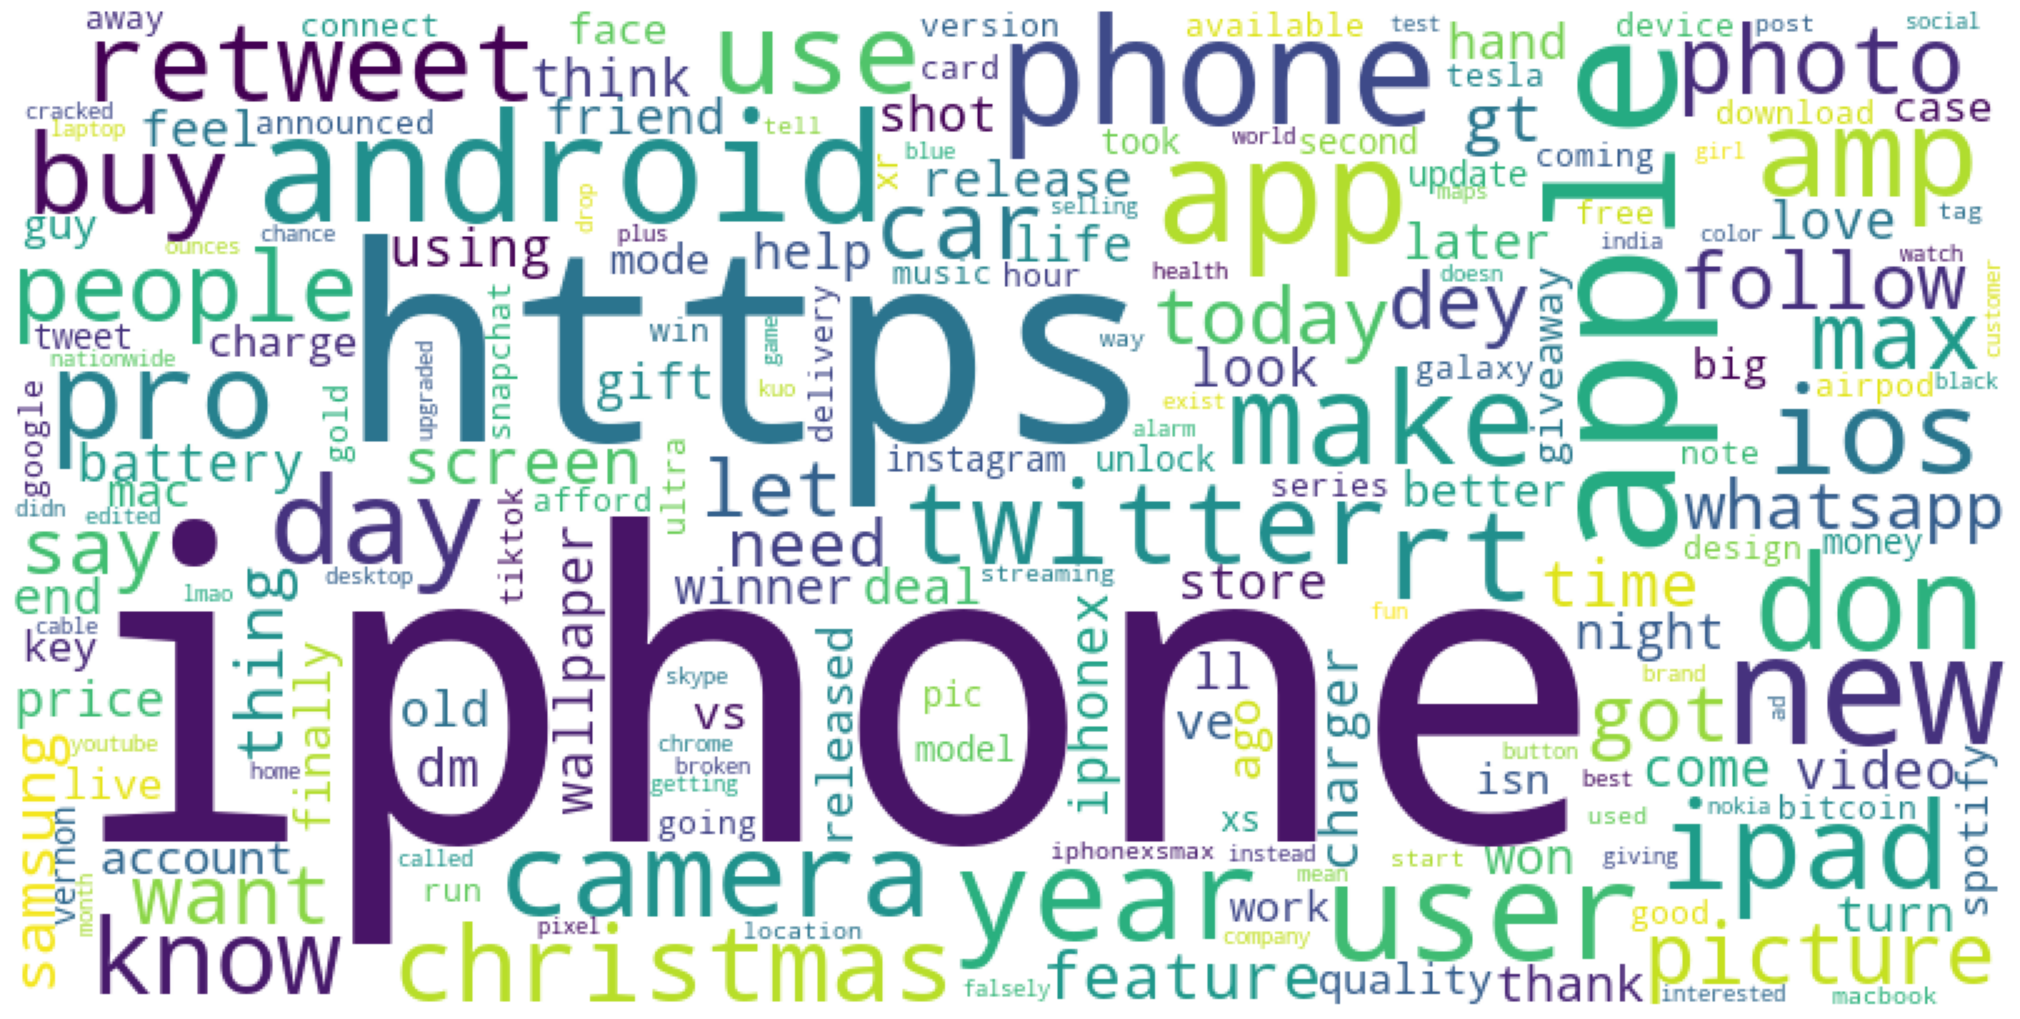

In [5]:
print("During COVID")
words_covid = tfid_vectorizer_covid.get_feature_names_out()
for_wordcloud_str_pre_covid = ' '.join(words_covid)

wordcloud = WordCloud(width=800, height=400, background_color ='white',
                      min_font_size = 7).generate(for_wordcloud_str_pre_covid)

plt.figure(figsize=(20, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
 
plt.show()

Post COVID


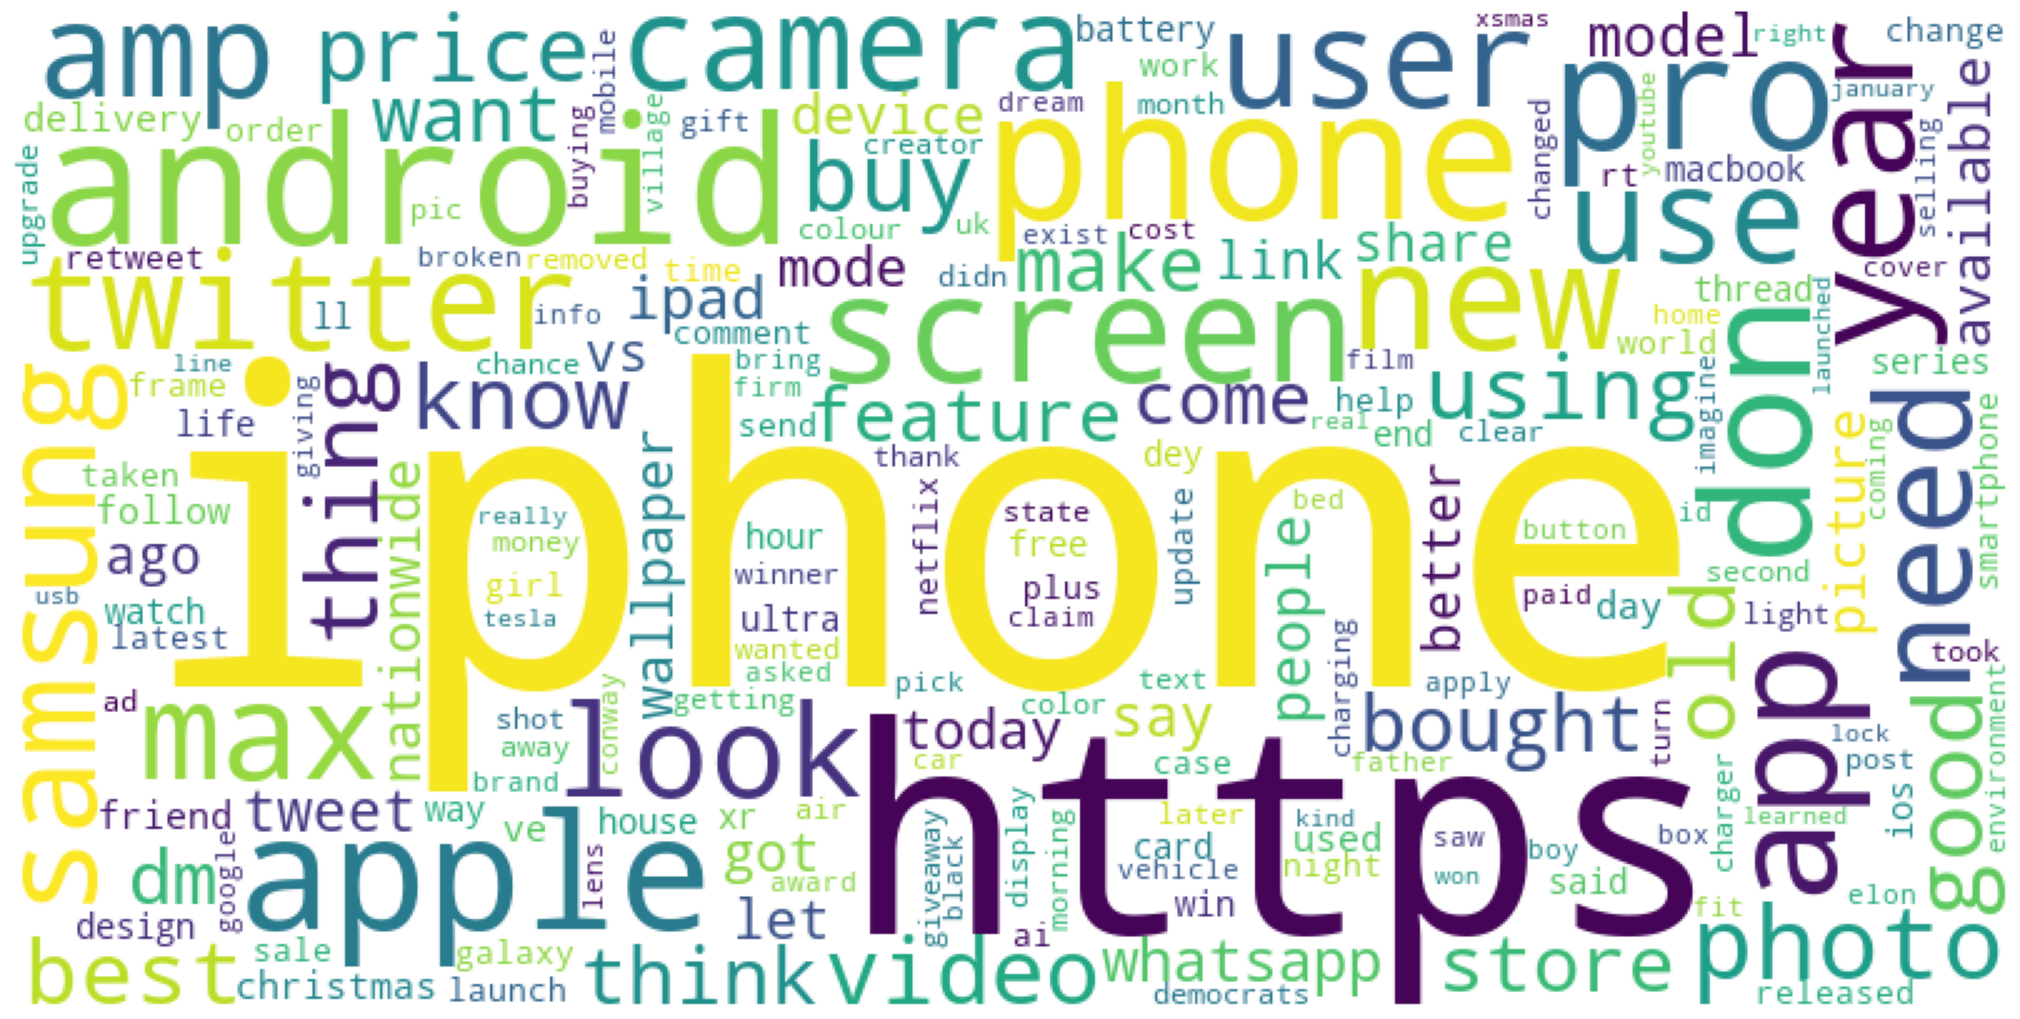

In [6]:
print("Post COVID")
words_post_covid = tfid_vectorizer_post_covid.get_feature_names_out()
for_wordcloud_str_pre_covid = ' '.join(words_post_covid)

wordcloud = WordCloud(width=800, height=400, background_color ='white',
                      min_font_size = 7).generate(for_wordcloud_str_pre_covid)

plt.figure(figsize=(20, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
 
plt.show()

# Sentiment Prediction

In [2]:
# Extracting models
zip_file_path = "sentiment_analysis_model.zip"
pkl_file_name = "sentiment_analysis_model.pkl"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    with zip_ref.open(pkl_file_name, 'r') as pkl_file:
        data = pickle.load(pkl_file)

model = data['model']
tfid_vectorizer = data['tfid_vectorizer']

d:\Stamp\trial propensity 2 buy\.venv\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\risma\AppData\Local\Temp\ipykernel_17012\3898346040.py:7: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  data = pickle.load(pkl_file)
d:\Stamp\trial propensity 2 buy\.venv\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator TfidfTransformer from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitation

In [ ]:
def get_sentiment_clause(x):
    if x == 0:
        return 'Negative'
    elif x == 1:
        return 'Neutral'
    else:
        return 'Positive'

df['Sentiment'] = df['full_text'].apply(lambda x: model_final.predict(tfid_vectorizer.transform([x]))[0])
df['Sentiment_Proba'] = df['full_text'].apply(lambda x: model_final.predict_proba(tfid_vectorizer.transform([x]))[0])
df['Negative_Proba'] = df['Sentiment_Proba'].apply(lambda x: x[0])
df['Neutral_Proba'] = df['Sentiment_Proba'].apply(lambda x: x[1])
df['Positive_Proba'] = df['Sentiment_Proba'].apply(lambda x: x[2])
df['Sentiment_Clause'] = df['Sentiment'].apply(lambda x: get_sentiment_clause(x))

In [ ]:
df.to_csv('sample_sentiment.csv', index=False)